## Data Science Task 3

#### Dr. Ignaz Semmelweis’s discovery of the importance of handwashing in hospitals revolutionized healthcare and significantly reduced mortality rates. In this project, we will recreate Dr. Semmelweis’s discovery using Python. We will read the historical dataset, explore the relationship between variables over different periods, perform calculations to compare mortality rates before and after handwashing implementation, and visualize the impact of handwashing on reducing mortality rates.

### Objective :

#### Recreate Dr. Ignaz Semmelweis’s discovery of the importance of handwashing in hospitals using Python.

### Tasks
#### 1) Data Loading and Exploration
#### 2) Exploring relationship between Variables
#### 3) Data Visualization of mortality rates

### Deliverables

 #### 1.A description of the data loading and exploration process.
 #### 2.Analysis of the relationship between variables over different periods.
 #### 3.Calculations to compare mortality rates before and after handwashing implementation.
 #### 4.Data visualizations illustrating the impact of handwashing on reducing mortality rates.

### Step 1: Imports necessary libraries

#### Import the data and packages that required for data exploration

In [1]:
# Packages for data preprocessing and manipulation
import pandas as pd
import numpy as np
# Packages for visualization
import matplotlib.pyplot as plt
%matplotlib inline 

### step 2: Read the yearly death dataset

In [2]:
# Load the dataset by running this cell
year_df=pd.read_csv('yearly_deaths.csv')
year_df.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


###  step 3: Explore data with Exploratory Data Analysis
#### Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.

In [3]:
year_df.head(10)

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [4]:
year_df.shape

(12, 4)

#### news_df dataframe consist of 12 rows and 4 columns

#### Generate summary statistics using the describe() method

In [5]:
year_df.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


#### summary information using the info() method.

In [6]:
year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


#### There are no missing values in data

#### Now calculate how many deaths are counted for each clinic

In [7]:
year_df.groupby('clinic')['deaths'].sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

#### The above results shows us the number of births and deaths in 2 clinics from the year 1841 till 1846. It's obvious that the number of deaths in clinic 1 is higher than that of clinic 2. 

#### To perform some Analysis we have to calculate proportion of deaths and births

In [8]:
year_df['proportion of deaths']=year_df['deaths']/year_df['births']
year_df.head(10)

,year,births,deaths,clinic,proportion of deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


#### We have to seperate the dataset in two datasets one for each clinics

In [9]:
clinic1=year_df[year_df['clinic']=='clinic 1']
clinic2=year_df[year_df['clinic']=='clinic 2']

In [10]:
clinic1.head()

,year,births,deaths,clinic,proportion of deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


In [11]:
clinic2.head()

,year,births,deaths,clinic,proportion of deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364


#### Visualize the Number of deaths every year in clinic 1


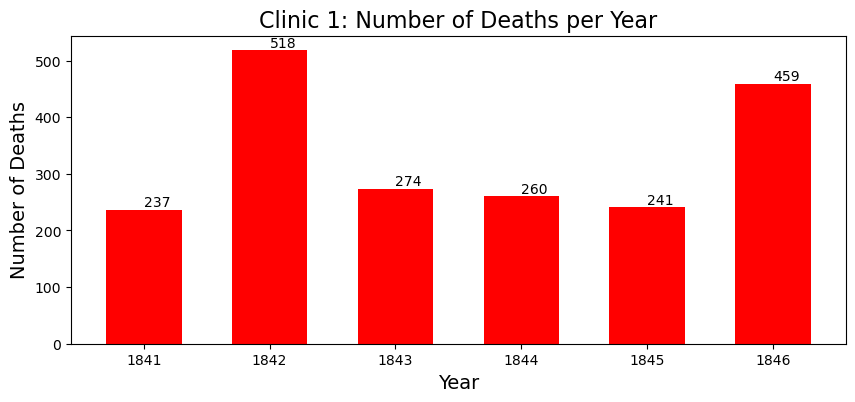

In [12]:
# Visualize the Number of deaths every year in clinic 1
fig, ax = plt.subplots(figsize=(10, 4))

# Plotting the bar chart
bars = plt.bar(clinic1.year, clinic1.deaths, width=0.6, color="red")

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Setting title and labels
plt.title("Clinic 1: Number of Deaths per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

# Showing the plot
plt.show()


#### Visualize the Number of deaths every year in clinic 2


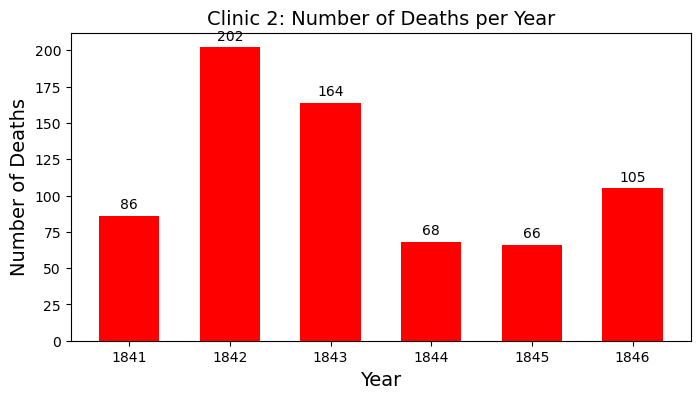

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plotting the bar chart
bars = ax.bar(clinic2.year, clinic2.deaths, width=0.6, color="red")

# Setting title and labels
ax.set_title("Clinic 2: Number of Deaths per Year", fontsize=14)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Number of Deaths", fontsize=14)

# Annotating each bar with its value
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(int(height)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()



#### It seems that 1842 was a pretty hectic year in both clinic 1 & 2 where the numbers of deaths were 518 and 202 respectively

#### Plot the proportion of deaths in clinic 1 and 2

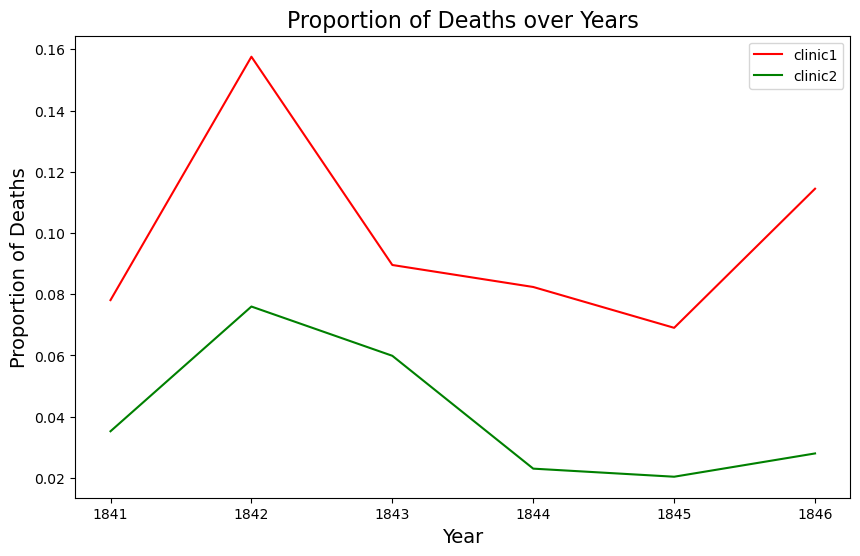

In [14]:
# Assuming clinic1 and clinic2 are DataFrames with 'year' and 'Proportion of Deaths' columns

# Plotting clinic_1 data
plt.figure(figsize=(10, 6))
plt.plot(clinic1["year"], clinic1['proportion of deaths'], label="clinic1", color="red")

# Plotting clinic_2 data on the same axis
plt.plot(clinic2["year"], clinic2['proportion of deaths'], label="clinic2", color="green")

# Adding title and labels
plt.title("Proportion of Deaths over Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)
plt.legend()

# Display the plot
plt.show()


#### By looking further into why this happened, Dr Semmelweis realized that many medical students worked at clinic 1 who also as a part of their study, spend a lot of time in the autopsy room. So, he realized that dealing with corpses spread bacteria that would be transferred to the women giving birth, infecting them with the deadly childbed fever, which was the main reason for the high mortality rates. 

### step 4: Load Monthly Death dataset

In [15]:
# Read the monthly dataset
month_df = pd.read_csv("monthly_deaths.csv")
month_df.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [16]:
month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [17]:
#Calculate the proportion of deaths per month
month_df["Proportion of Deaths"]= month_df["deaths"] / month_df["births"]
month_df.head()

,date,births,deaths,Proportion of Deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


#### Dr Semmelweis ordered the doctors to wash their hands and made it obligatory in the summer of 1847 to see if that will affect the number of deaths, and since we have the monthly data now, we can trace the number of deaths before and after the handwashing started. 

In [18]:
#Change the data type of "date" column from string to datatime
month_df.dtypes
month_df['date'] =  pd.to_datetime(month_df['date'])

In [19]:
# Label the date at which handwashing started to "start_handwashing"
start_handwashing = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = month_df[month_df["date"] < start_handwashing]
after_washing = month_df[month_df["date"] >= start_handwashing]

### Before Handwashing

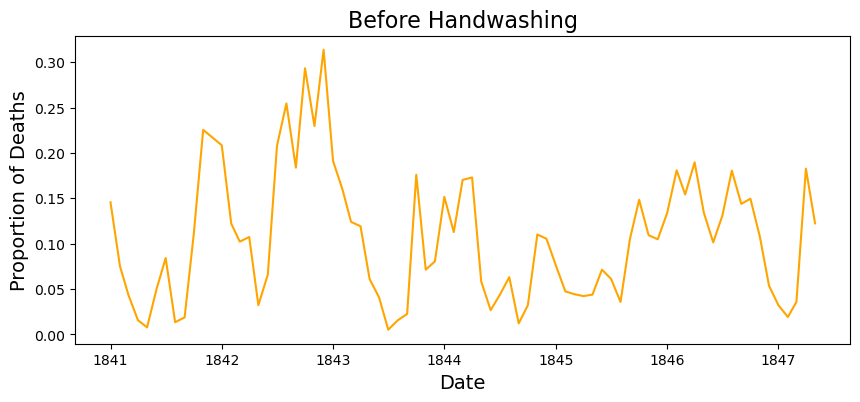

In [20]:
# Assuming before_washing is a DataFrame with 'date' and 'Proportion of Deaths' columns

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 4))

# Plotting the data
x = before_washing["date"]
y = before_washing["Proportion of Deaths"]
ax.plot(x, y, color="orange")

# Setting title and labels
ax.set_title("Before Handwashing", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Proportion of Deaths", fontsize=14)

# Display the plot
plt.show()


### After Handwashing

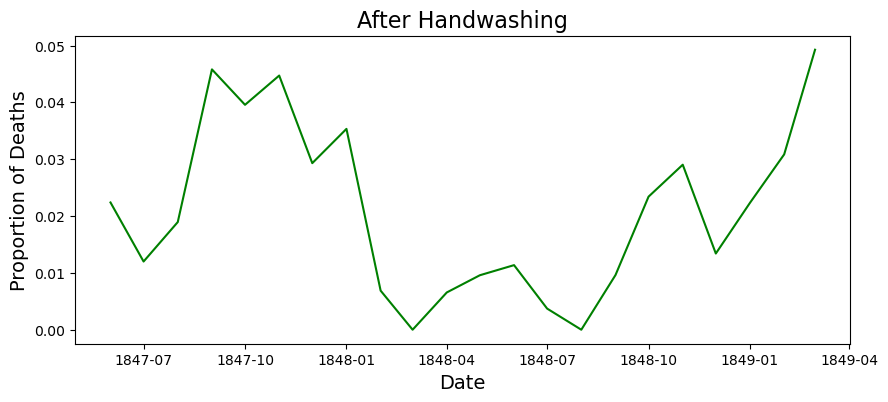

In [21]:
# Assuming after_washing is a DataFrame with 'date' and 'Proportion of Deaths' columns

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 4))

# Plotting the data
x = after_washing["date"]
y = after_washing["Proportion of Deaths"]
ax.plot(x, y, color="green")

# Setting title and labels
ax.set_title("After Handwashing", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Proportion of Deaths", fontsize=14)

# Display the plot
plt.show()


#### To see the difference clearly, let's combine the 2 plots in one chart.

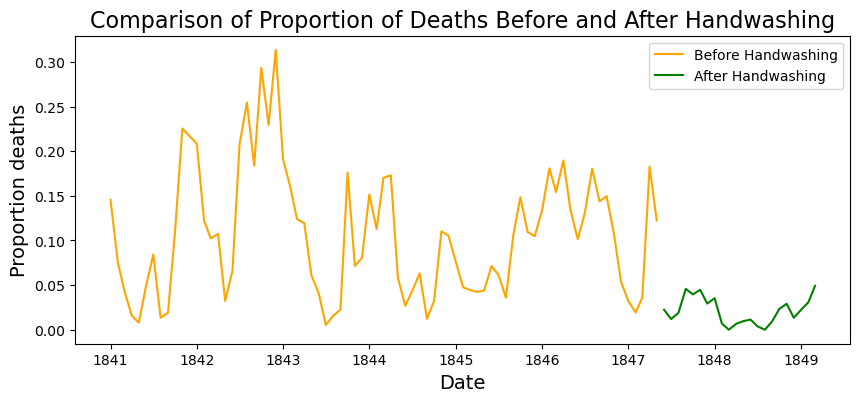

In [22]:
# Assuming before_washing and after_washing are DataFrames with 'date' and 'Proportion of Deaths' columns

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 4))

# Plotting before_washing data
before_washing_plot = ax.plot(before_washing["date"], before_washing["Proportion of Deaths"], label="Before Handwashing", color="orange")

# Plotting after_washing data on the same axis
after_washing_plot = ax.plot(after_washing["date"], after_washing["Proportion of Deaths"], label="After Handwashing", color="green")

# Adding ylabel
ax.set_ylabel("Proportion deaths", fontsize=14)

# Adding title and legend
ax.set_title("Comparison of Proportion of Deaths Before and After Handwashing", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.legend()

# Display the plot
plt.show()


#### The difference is pretty clear! the proportion of deaths dramatically decreased after handwashing was made obligatory.

#### Let's calculate exactly how much did handwashing decreased the proportion of deaths on average.

In [23]:
before_prop = before_washing["Proportion of Deaths"]
after_prop = after_washing["Proportion of Deaths"]


In [24]:
before_prop.mean()

0.10504998260908789

In [25]:
after_prop.mean()

0.021093375097254535

In [26]:
# Calculate the difference between both proportions
mean_diff = after_prop.mean() - before_prop.mean()
mean_diff

-0.08395660751183336

### Conclusion
#### The minus sign indicate that there is a decrease. So handwashing decreased the proportion of deaths from 10% to 2% i.e, by approximately 8%.